In [1]:
import jax
import jax.numpy as jnp
from abm.spatial_compartmental.sir import get_abm 
from abm.spatial_compartmental.utils import Neighbourhood, calc_start_n_initial, _NEIGHBOURHOOD_DICT
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from functools import partial
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import time

In [2]:
def viz_grid(abm_grid, ax):
    colors = ['gainsboro','#67a9cf','#ef8a62','#7fbf7b']#['gainsboro',"deepskyblue","darkorange","limegreen"]
    cmap = ListedColormap(colors)
    states = jnp.clip(2*abm_grid[0,:,:] + abm_grid[1,:,:]+ 3*abm_grid[2,:,:], max=3)
    #ax.imshow(states, cmap=cmap, interpolation='nearest',vmin=0,vmax=3) # Initialize with the first grid
    ax.pcolormesh(states, cmap=cmap,shading='flat', edgecolors='face',vmin=0, vmax=3)
    #ax.set_title('ABM Grid')
    return ax

In [3]:
def abm_state_counts(abm_grid):
    return {
    "Unoccupied":  int(((abm_grid[0,:,:]==0) & (abm_grid[1,:,:]==0) & (abm_grid[2,:,:]==0)).sum()),
    "Susceptible": int(((abm_grid[0,:,:]==0) & (abm_grid[1,:,:]==1) & (abm_grid[2,:,:]==0)).sum()),
    "Infected":  int(((abm_grid[0,:,:]==1) & (abm_grid[1,:,:]==0) & (abm_grid[2,:,:]==0)).sum()),
    "Recovered": int(((abm_grid[0,:,:]==0) & (abm_grid[1,:,:]==0) & (abm_grid[2,:,:]==1)).sum()),
    }
    

In [38]:
si_abm = get_abm(Neighbourhood.DIAGONAL)

In [6]:
?si_abm

Signature:
si_abm(
    convolution_kernel: Union[jax.Array, numpy.ndarray, numpy.bool, numpy.number, bool, int, float, complex],
    valid_offsets_array: Union[jax.Array, numpy.ndarray, numpy.bool, numpy.number, bool, int, float, complex],
    key: <function PRNGKey at 0x7f9bae88b060>,
    grid_size: int,
    num_steps: int,
    p_infect: float,
    p_recover: float,
    p_wane: float,
    p_move: float,
    total_population: int,
    n_initial_infected: int,
    n_initial_recovered: int,
) -> jax.Array
Docstring: <no docstring>
File:      ~/Documents/thesis/dgs4abm/abm/spatial_compartmental/sir.py
Type:      function

In [52]:
GRID_SIZE=10
P_INFECT=0.5
abm_grids = si_abm(jax.random.key(42), GRID_SIZE, 5, P_INFECT, 0.0, 0.0, 0.0, GRID_SIZE**2, 15, 0)


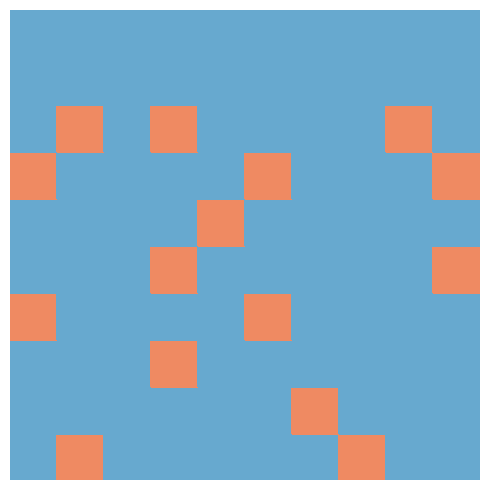

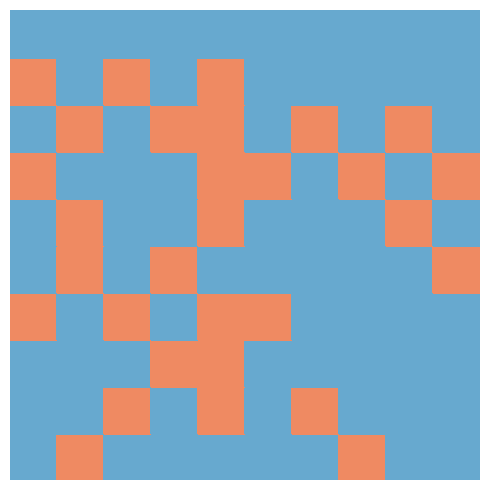

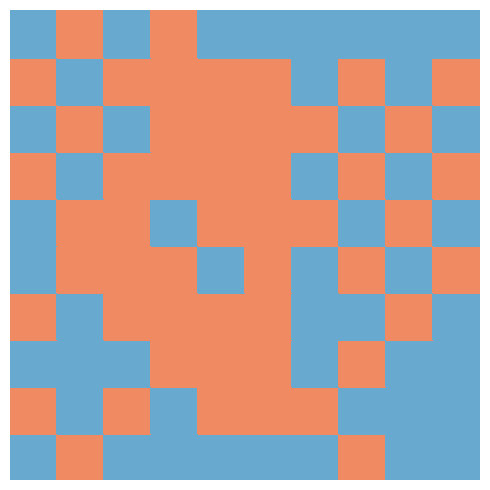

In [68]:
for i in range(3):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.axis('off')
    ax.set_aspect('equal', 'box')
    plt.tight_layout(w_pad=0, h_pad=0)
    viz_grid(abm_grids[i],ax)
    fig.savefig(f"../05_28_viz/si_grid_t{i}.pdf", bbox_inches='tight', pad_inches=0)

In [69]:
sir_abm = get_abm(Neighbourhood.VONNEUMANN)

In [83]:
GRID_SIZE=10
P_INFECT = 0.7
P_RECOVER = 0.2
P_WANE=0.2
P_MOVE=1.0
INITIAL_INFECTED = 5
INITIAL_RECOVERD= 2
TOTAL_POPULATION= 40
abm_grids = sir_abm(jax.random.key(42), GRID_SIZE, 5, P_INFECT, P_RECOVER, P_WANE, P_MOVE, TOTAL_POPULATION, INITIAL_INFECTED, INITIAL_RECOVERD)

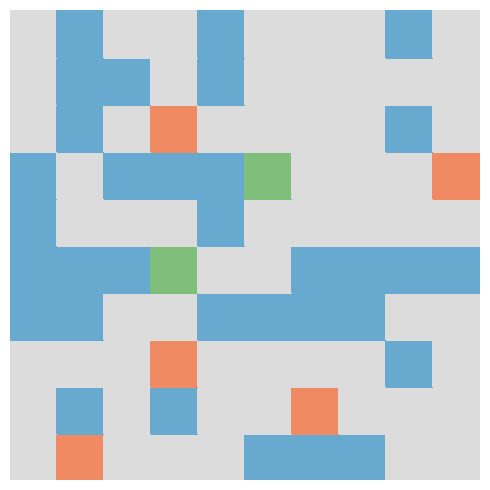

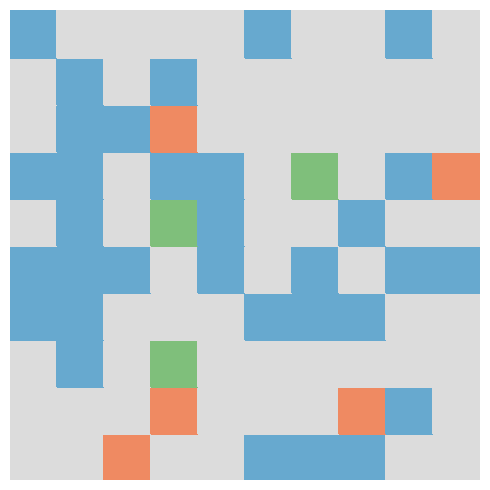

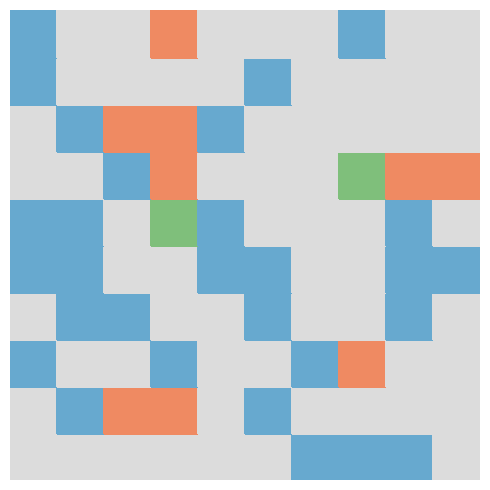

In [85]:
for i in range(3):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.axis('off')
    ax.set_aspect('equal', 'box')
    plt.tight_layout(w_pad=0, h_pad=0)
    viz_grid(abm_grids[i],ax)
    fig.savefig(f"../05_28_viz/sir_grid_t{i}.pdf", bbox_inches='tight', pad_inches=0)